<a href="https://colab.research.google.com/github/Puplu16/-MLproject/blob/main/Bantu_Here.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: AYAN BANERJEE**


**Bantu Mukherjee**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
import seaborn as sns
from sklearn.ensemble import VotingClassifier

In [ ]:
data=pd.read_csv("/content/HeartDisease.csv")

In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [ ]:
# Check the unique values in the column before mapping
print(data['vessels_colored_by_flourosopy'].unique())


['Two' 'Zero' 'One' 'Three' 'Four']


In [ ]:
# Check the column names in the dataset
print(data.columns)


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')


In [ ]:
data['vessels_colored_by_flourosopy'].value_counts()

,count
vessels_colored_by_flourosopy,
Zero,578
One,226
Two,134
Three,69
Four,18


In [ ]:
# Map the 'vessels_colored_by_flourosopy' column from words to numbers
vessel_map = {
    'Two':2, 'Zero':0, 'One':1, 'Three':3, 'Four':4
}

data['vessels_colored_by_flourosopy'] = data['vessels_colored_by_flourosopy'].map(vessel_map)

# Check the transformation
data['vessels_colored_by_flourosopy'].value_counts()

,count
vessels_colored_by_flourosopy,
0,578
1,226
2,134
3,69
4,18


In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,2,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,0,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,0,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,1,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,3,Fixed Defect,0


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

data['fasting_blood_sugar'] = label_encoder.fit_transform(data['fasting_blood_sugar'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['rest_ecg'] = label_encoder.fit_transform(data['rest_ecg'])
data['thalassemia'] = label_encoder.fit_transform(data['thalassemia'])
data['chest_pain_type'] = label_encoder.fit_transform(data['chest_pain_type'])
data['slope'] = label_encoder.fit_transform(data['slope'])
data['exercise_induced_angina'] = label_encoder.fit_transform(data['exercise_induced_angina'])





In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,2,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,0,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,0,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,3,0,0


In [ ]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,2.171707,131.611707,246.00000,0.850732,1.485854,149.114146,0.336585,1.071512,0.614634,0.754146,1.331707,0.513171
std,9.072290,0.460373,0.959013,17.516718,51.59251,0.356527,0.528527,23.005724,0.472772,1.175053,0.617755,1.030798,1.444014,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.00000,1.000000,1.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,240.00000,1.000000,2.000000,152.000000,0.000000,0.800000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,3.000000,140.000000,275.00000,1.000000,2.000000,166.000000,1.000000,1.800000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   int64  
 2   chest_pain_type                1025 non-null   int64  
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   int64  
 6   rest_ecg                       1025 non-null   int64  
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   int64  
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   int64  
 11  vessels_colored_by_flourosopy  1025 non-null   int64  
 12  thalassemia                    1025 non-null   i

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,2,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,0,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,0,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,3,0,0


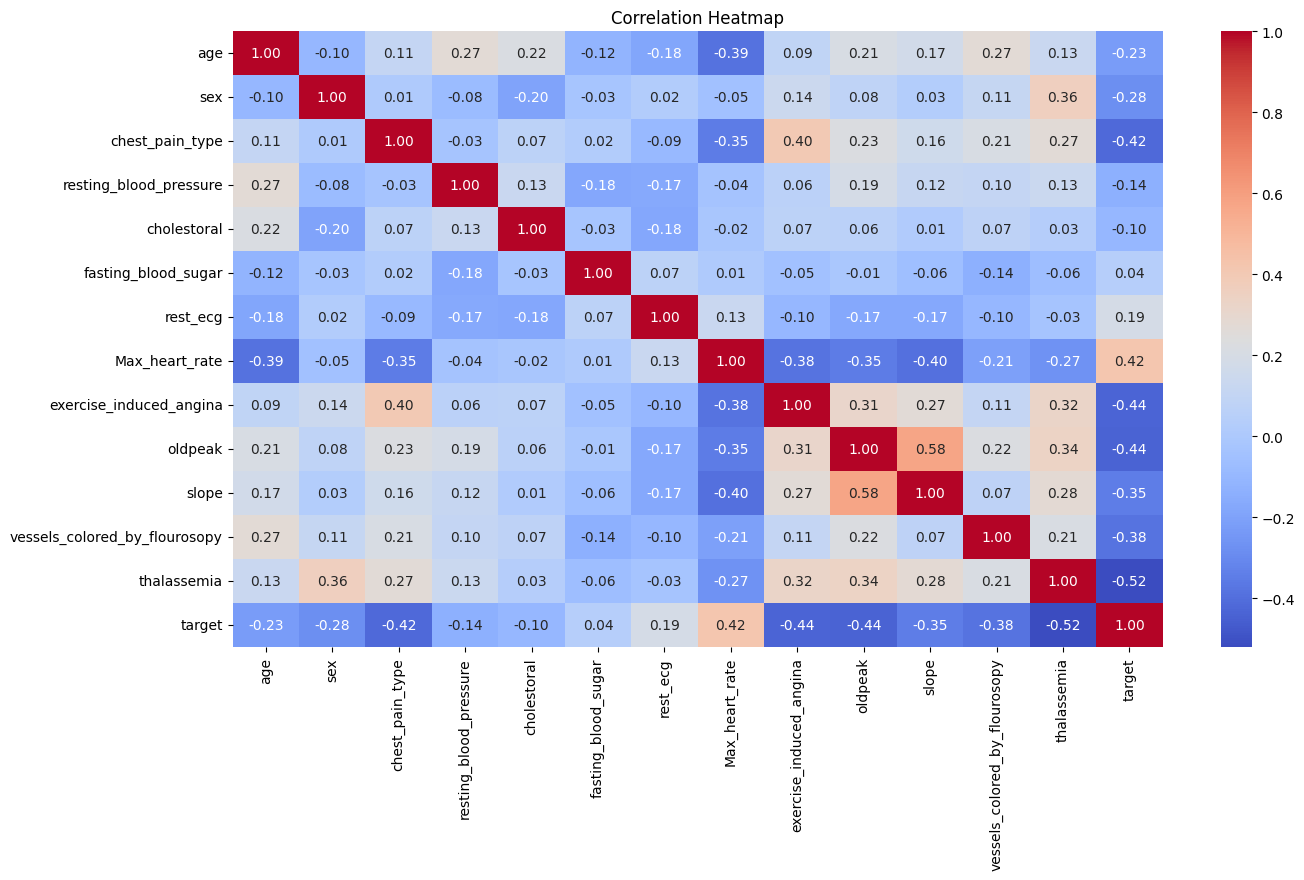

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, fmt=".2f" ,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Q1: 0.0
Q2 (Median): 1.0
Q3: 1.0
Min: 0
Max: 1


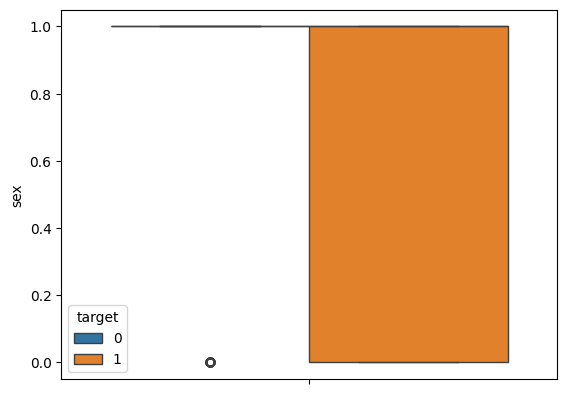

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 2.0
Q2 (Median): 2.0
Q3: 3.0
Min: 0
Max: 3


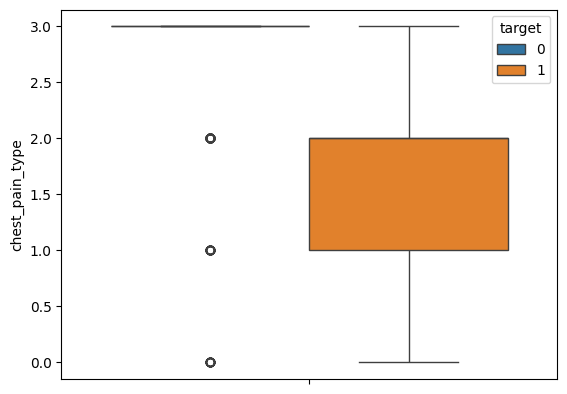

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 120.0
Q2 (Median): 130.0
Q3: 140.0
Min: 94
Max: 200


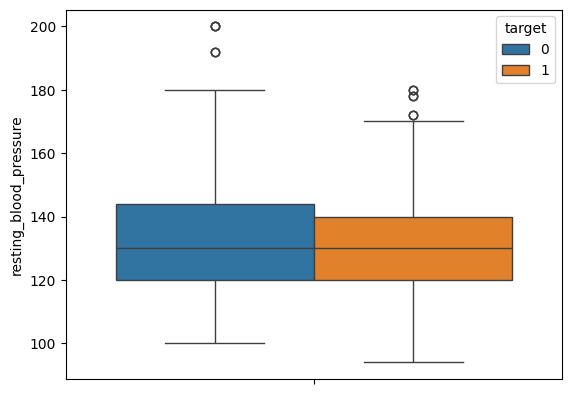

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 211.0
Q2 (Median): 240.0
Q3: 275.0
Min: 126
Max: 564


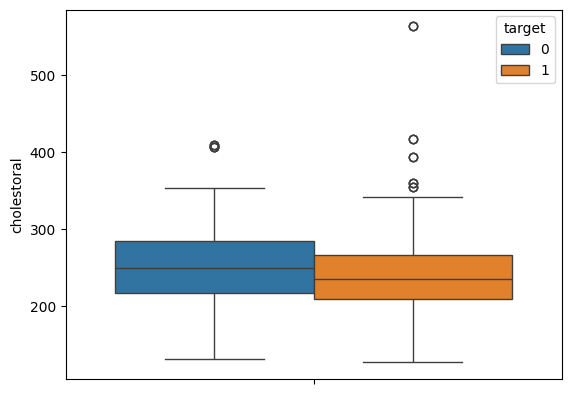

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 1.0
Q2 (Median): 1.0
Q3: 1.0
Min: 0
Max: 1


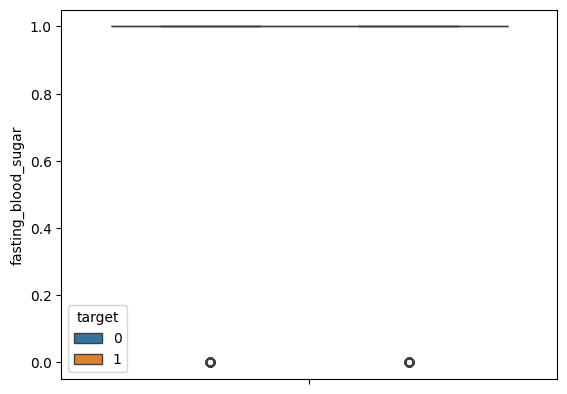

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 1.0
Q2 (Median): 2.0
Q3: 2.0
Min: 0
Max: 2


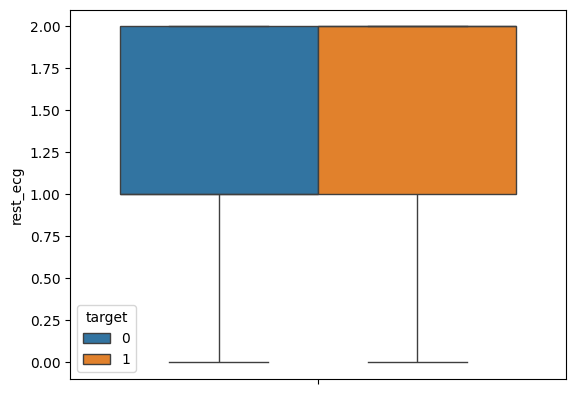

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 132.0
Q2 (Median): 152.0
Q3: 166.0
Min: 71
Max: 202


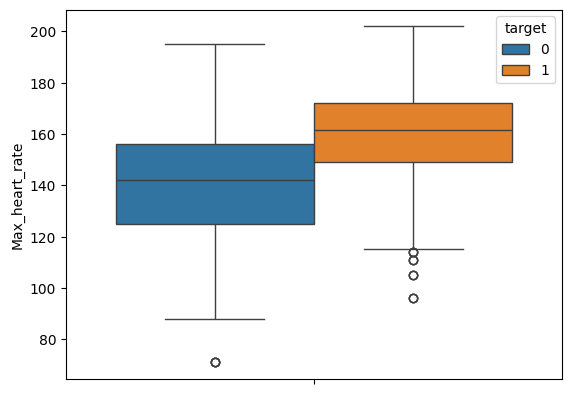

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 0.0
Q2 (Median): 0.0
Q3: 1.0
Min: 0
Max: 1


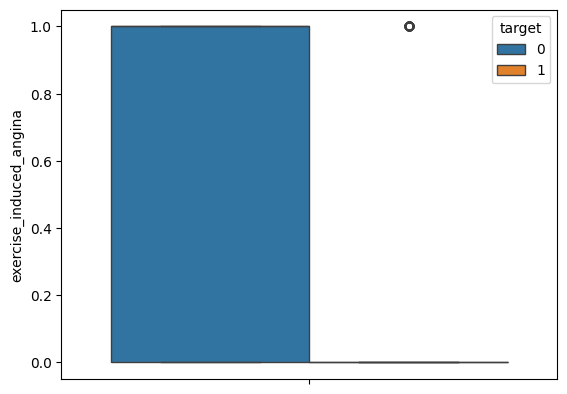

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 0.0
Q2 (Median): 0.8
Q3: 1.8
Min: 0.0
Max: 6.2


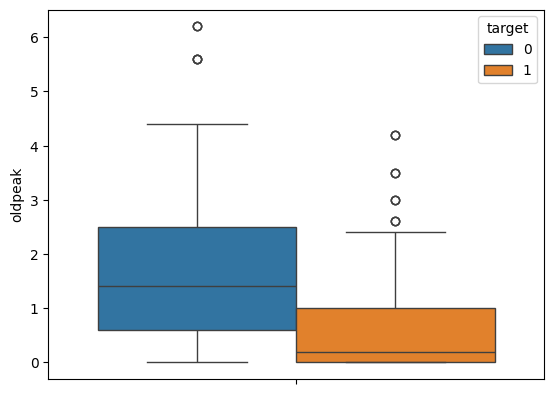

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 0.0
Q2 (Median): 1.0
Q3: 1.0
Min: 0
Max: 2


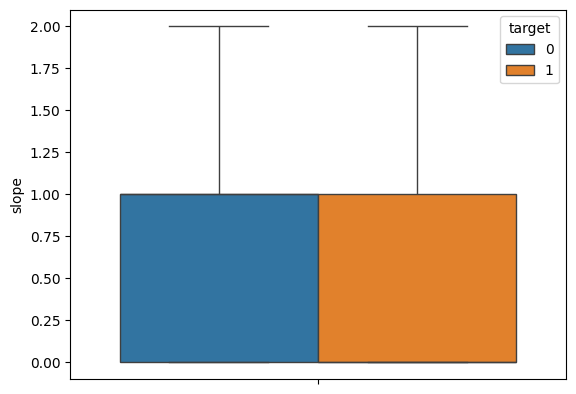

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 0.0
Q2 (Median): 0.0
Q3: 1.0
Min: 0
Max: 4


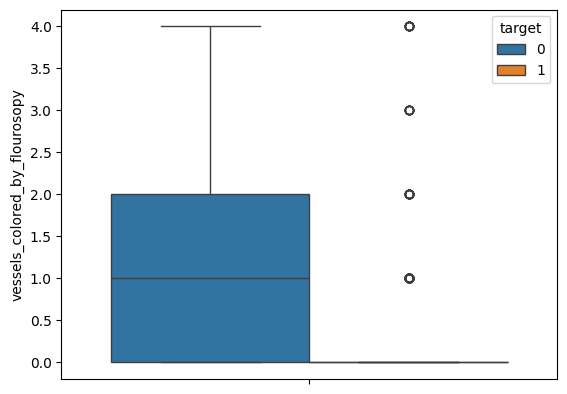

------------------------------------------------------------------------------------------------------------------------------------------------------
Q1: 0.0
Q2 (Median): 0.0
Q3: 3.0
Min: 0
Max: 3


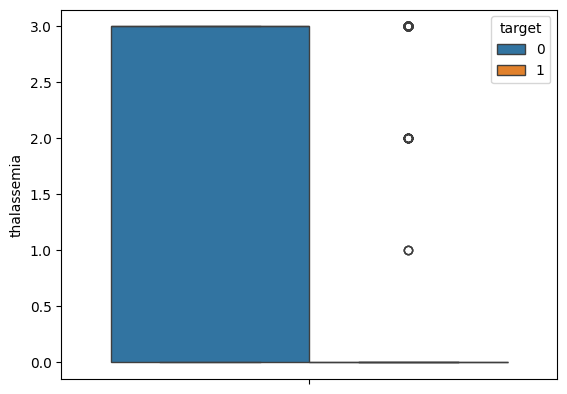

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for column in data.columns[1:-1]:
    q1 = np.percentile(data[column], 25)
    q2 = np.percentile(data[column], 50)
    q3 = np.percentile(data[column], 75)
    data_min = np.min(data[column])
    data_max = np.max(data[column])
    print("Q1:", q1)
    print("Q2 (Median):", q2)
    print("Q3:", q3)
    print("Min:", data_min)
    print("Max:", data_max)
    sns.boxplot(data=data,y = column, hue='target')
    plt.show()
    print('-' * 150)

In [ ]:
X = data.drop(columns=['target'])

y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training data shape: X_train=(820, 13), y_train=(820,)
Testing data shape: X_test=(205, 13), y_test=(205,)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8048780487804879
Confusion Matrix:
[[75 27]
 [13 90]]


In [ ]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7692307692307693
0.8737864077669902


In [ ]:
y_prob_lr = model.predict_proba(X_test_scaled)[:, 1] # Probability of class 1
# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

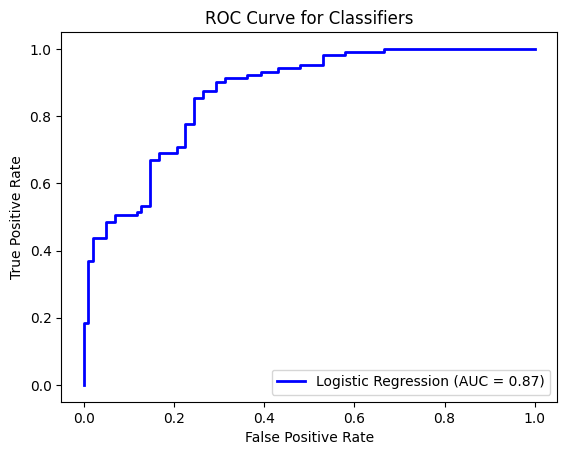

In [ ]:
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Confusion Matrix:
[[102   0]
 [  3 100]]


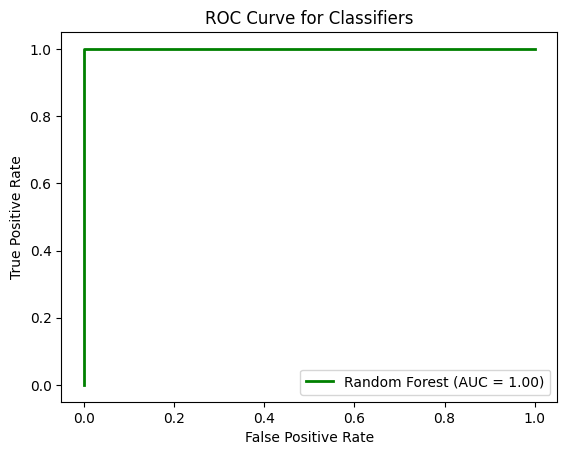

In [ ]:

# For Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# SVM


In [ ]:
from sklearn.svm import SVC

# SVM Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       102
           1       0.77      0.85      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

SVM Confusion Matrix:
[[75 27]
 [15 88]]


In [ ]:
# SVM Classifier
svm_model = SVC(kernel='poly', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       102
           1       0.88      0.96      0.92       103

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205

SVM Confusion Matrix:
[[88 14]
 [ 4 99]]


In [ ]:
# SVM Classifier
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       102
           1       0.84      0.95      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

SVM Confusion Matrix:
[[84 18]
 [ 5 98]]


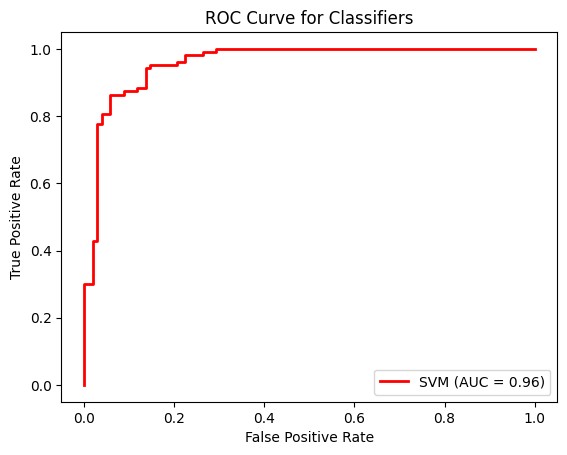

In [ ]:
# For SVM (ensure you set probability=True)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1


# Compute ROC curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')

# Show the plot
plt.show()

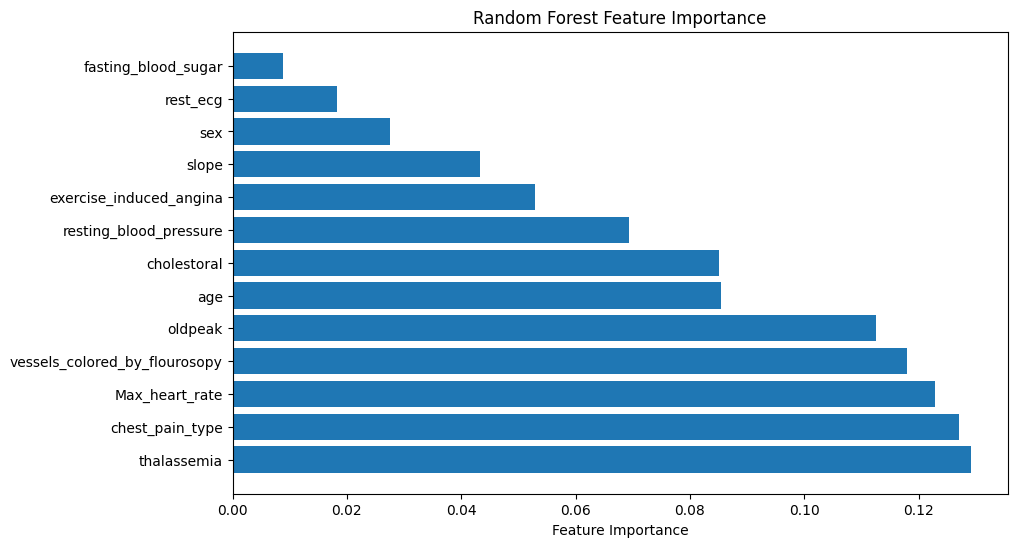

In [ ]:
import numpy as np

# Get feature importances
feature_importance = rf_model.feature_importances_

# Sort the features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Decision Tree Classifier

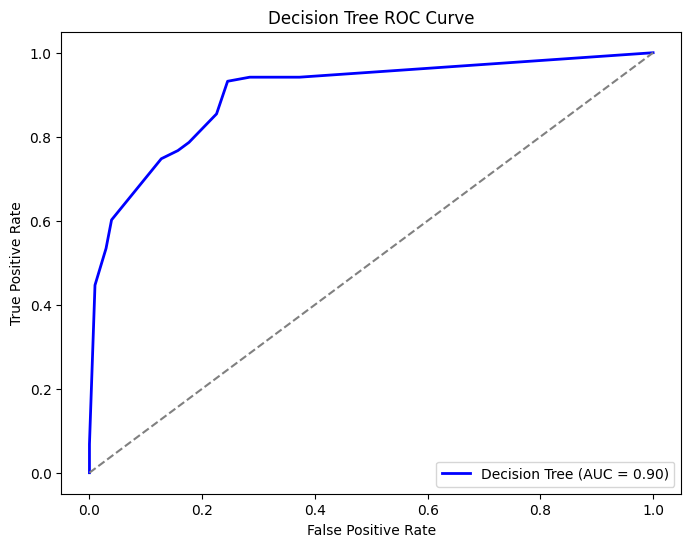

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       102
           1       0.79      0.85      0.82       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

Decision Tree Confusion Matrix:
[[79 23]
 [15 88]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt


dt_model = DecisionTreeClassifier(random_state=42,max_depth=5)

dt_model.fit(X_train_scaled, y_train)

# Step 3: Predict probabilities for the positive class (class 1)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1

# Step 4: Compute ROC curve and AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Step 5: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Step 6: Additional Evaluation
# Print classification report and confusion matrix
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


## BAGGING

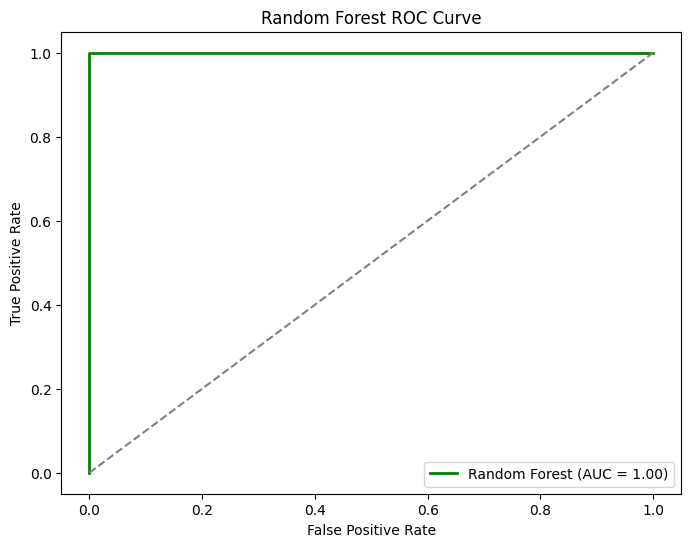

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Confusion Matrix:
[[102   0]
 [  3 100]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict probabilities for class 1 (positive class)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Additional evaluation: Classification report and confusion matrix
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


# BOOSTING

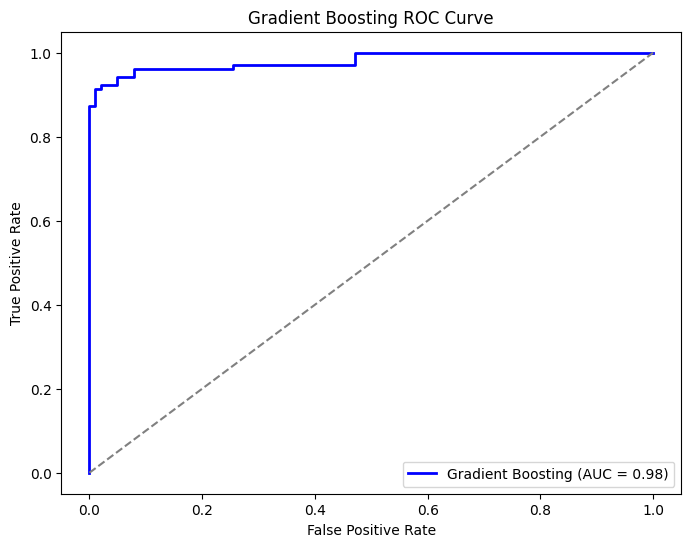

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.95      0.94      0.95       103

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

Gradient Boosting Confusion Matrix:
[[97  5]
 [ 6 97]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Here Initializing the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

#Here we are Training the model
gb_model.fit(X_train_scaled, y_train)

# Predict probabilities for class 1 (positive class)
y_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Additional evaluation: Classification report and confusion matrix
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


# ADABOOSTING

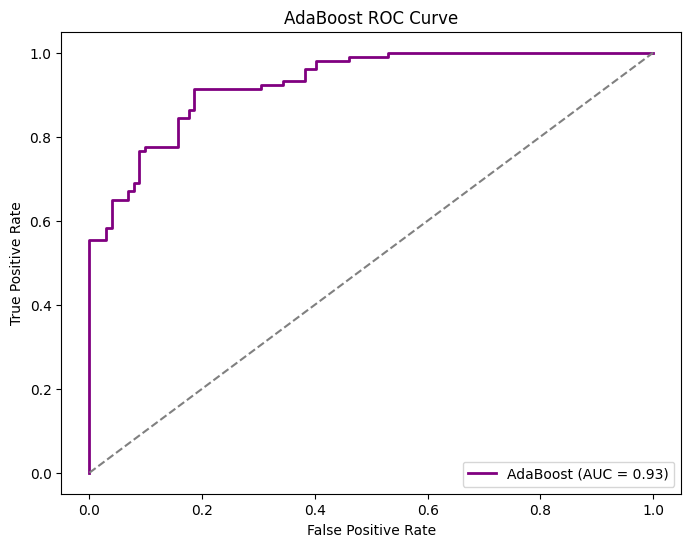

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       102
           1       0.83      0.90      0.87       103

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

AdaBoost Confusion Matrix:
[[83 19]
 [10 93]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize AdaBoost with a weak learner (decision tree with max_depth=1)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42,algorithm='SAMME')

# Train the model
ada_model.fit(X_train_scaled, y_train)

# Predict probabilities for class 1 (positive class)
y_prob_ada = ada_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='purple', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Additional evaluation: Classification report and confusion matrix
y_pred_ada = ada_model.predict(X_test_scaled)

print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))

print("AdaBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))


# Voting Classifier

In [ ]:
voting_clf=VotingClassifier(estimators=[('logreg',model),('rf',rf_model),('SVC',svm_model),('adaboost',ada_model)],voting='soft')
voting_clf.fit(X_train_scaled,y_train)
y_prob_vote = voting_clf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_vote)


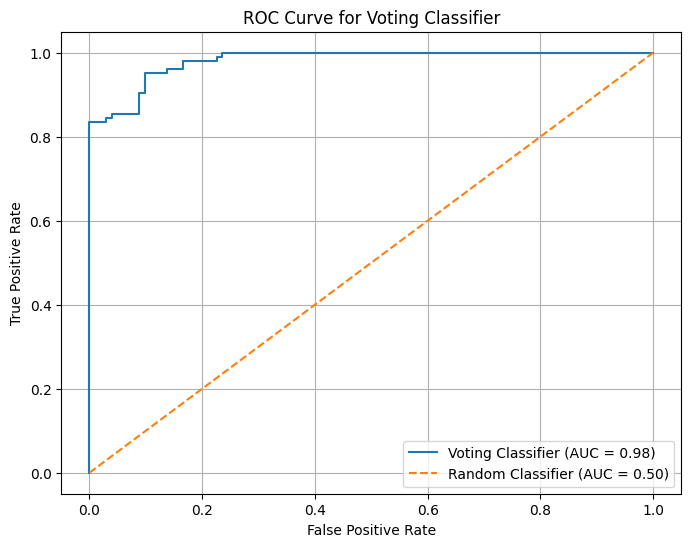

In [ ]:
# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob_vote)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

voting_clf = VotingClassifier(estimators=[('logreg', model),
                                          ('rf', rf_model),
                                          ('SVC', svm_model),
                                          ('adaboost', ada_model)],
                              voting='soft')


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with scoring as accuracy
cv_results_accuracy = cross_val_score(voting_clf, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Calculating the Cross-validation with scoring as AUC (Area Under Curve)
cv_results_auc = cross_val_score(voting_clf, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

# Printing the Mean and standard deviation of cross validation results for both the accuracy and AUC
print(f"Accuracy: Mean = {np.mean(cv_results_accuracy):.4f}, Std = {np.std(cv_results_accuracy):.4f}")
print(f"AUC: Mean = {np.mean(cv_results_auc):.4f}, Std = {np.std(cv_results_auc):.4f}")


Accuracy: Mean = 0.9427, Std = 0.0252
AUC: Mean = 0.9829, Std = 0.0144
